## Aula01 - Explorando dados com pandas

In [ ]:
import pandas as pd

In [ ]:
ur="https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv"

df=pd.read_csv(ur)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0],df.shape[1]
print(f"O dataframe possui {linhas} linhas e {colunas} colunas")


O dataframe possui 133349 linhas e 11 colunas


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df.columns = [
    'ano',
    'senioridade',
    'contrato',
    'cargo',
    'salario',
    'moeda',
    'usd',
    'residencia',
    'remoto',
    'empresa',
    'tamanho_empresa'
]
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [ ]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [ ]:
df['senioridade'] = df['senioridade'].replace({
    'EN': 'Júnior',
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EX': 'Executivo'
})
df['senioridade'].value_counts()

,count
senioridade,
Sênior,77241
Pleno,40465
Júnior,12443
Executivo,3200


In [ ]:
df['contrato'] = df['contrato'].replace({
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'CT': 'Contrato',
    'FL': 'Freelancer'
})
df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [ ]:
df['tamanho_empresa'] = df['tamanho_empresa'].replace({
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
})
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [ ]:
df['remoto'] = df['remoto'].replace({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
})
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


## Aula 02 - Aprenda a limpar e preparar os dados

In [ ]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
import numpy as np

df_salarios=pd.DataFrame({'Nome':['Ana','Bruno','Carlos','Daniele','Val'],'Salário':[4000,np.nan,5000,np.nan,100000]})

df_salarios

,Nome,Salário
0,Ana,4000.0
1,Bruno,NaN
2,Carlos,5000.0
3,Daniele,NaN
4,Val,100000.0


In [ ]:
df_salarios['Salário'] = df_salarios['Salário'].fillna(df_salarios['Salário'].median())
df_salarios

,Nome,Salário
0,Ana,4000.0
1,Bruno,5000.0
2,Carlos,5000.0
3,Daniele,5000.0
4,Val,100000.0


In [ ]:
df_temperaturas=pd.DataFrame({'Dia':['seg','ter','quar','quin','sex'],'Temperatura':[30,np.nan,np.nan,28,27]})
df_temperaturas

,Dia,Temperatura
0,seg,30.0
1,ter,NaN
2,quar,NaN
3,quin,28.0
4,sex,27.0


In [ ]:
df_temperaturas['Temperatura'] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura
0,seg,30.0
1,ter,28.0
2,quar,28.0
3,quin,28.0
4,sex,27.0


In [ ]:
df_cidades=pd.DataFrame({'Nome':['Ana','Bruno','Carlos','Daniele','Val'],'Cidade':['São Paulo',np.nan,'Belo Horizonte',np.nan,'Rio de Janeiro']})
df_cidades

,Nome,Cidade
0,Ana,São Paulo
1,Bruno,NaN
2,Carlos,Belo Horizonte
3,Daniele,NaN
4,Val,Rio de Janeiro


In [ ]:
df_cidades['Cidade']=df_cidades['Cidade'].fillna("Não informado")
df_cidades

,Nome,Cidade
0,Ana,São Paulo
1,Bruno,Não informado
2,Carlos,Belo Horizonte
3,Daniele,Não informado
4,Val,Rio de Janeiro


In [ ]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()


,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df['ano']=df['ano'].astype('int64')
df

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Sênior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020,Júnior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena
133347,2020,Júnior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


## Aula 03 - Crie gráficos e conte histórias com Dados

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

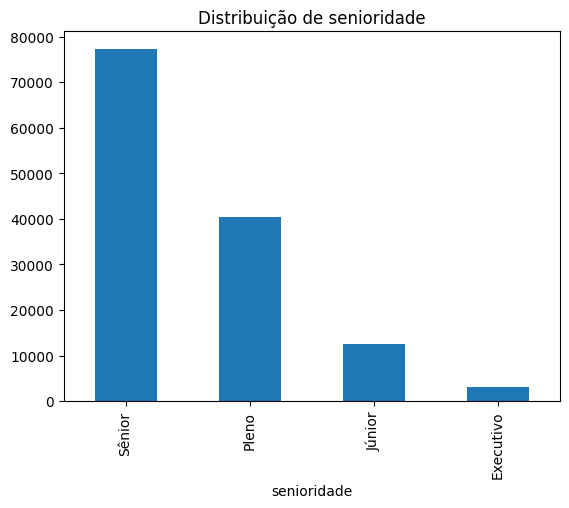

In [ ]:
df['senioridade'].value_counts().plot(kind='bar',title='Distribuição de senioridade')

<Axes: xlabel='senioridade', ylabel='usd'>

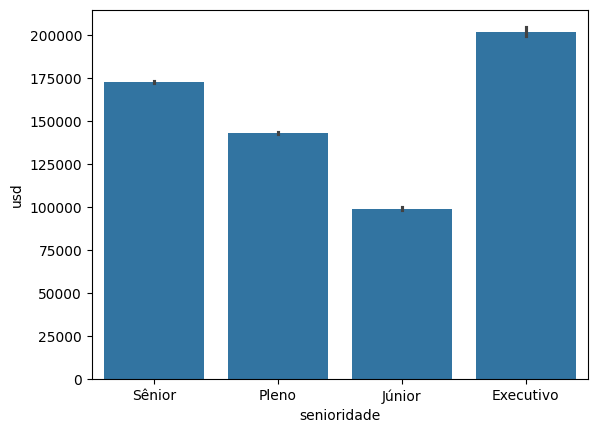

In [ ]:
import seaborn as sns

sns.barplot(data=df,x='senioridade',y='usd' )

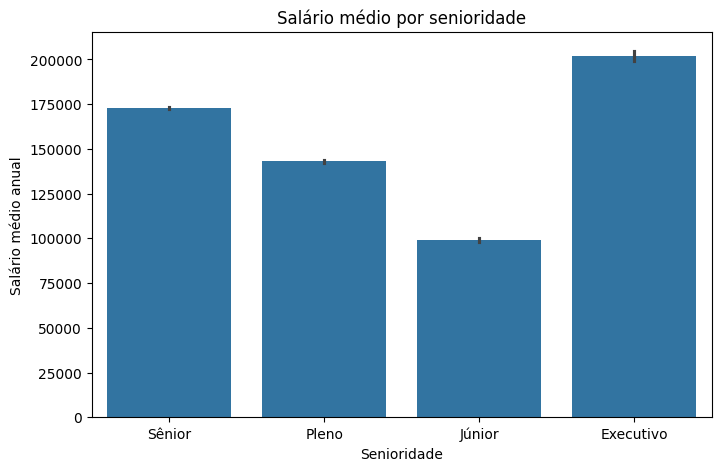

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df,x='senioridade',y='usd' )
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual')
plt.show()



In [ ]:
ordem=df.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem

Index(['Júnior', 'Pleno', 'Sênior', 'Executivo'], dtype='object', name='senioridade')

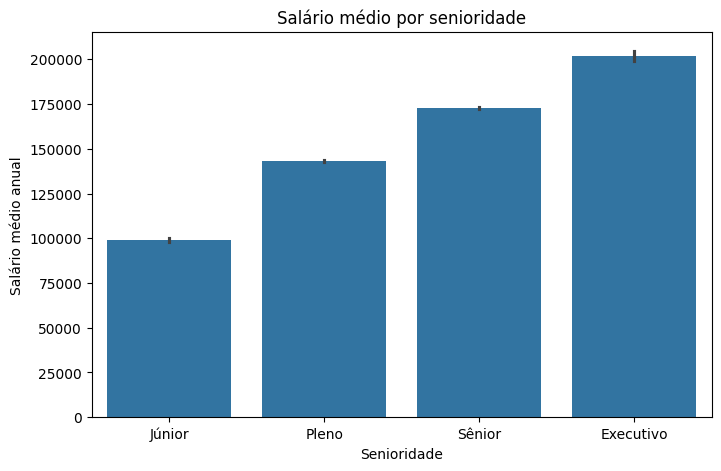

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df,x='senioridade',y='usd' ,order=ordem)
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual')
plt.show()



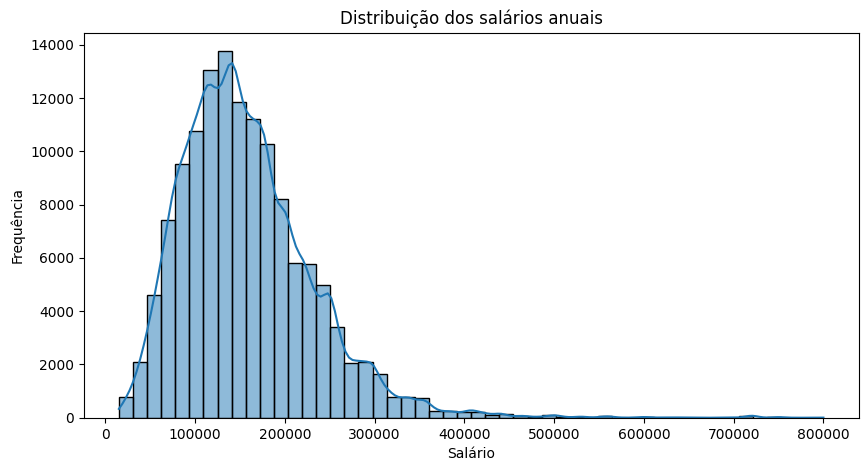

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['usd'],bins=50,kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

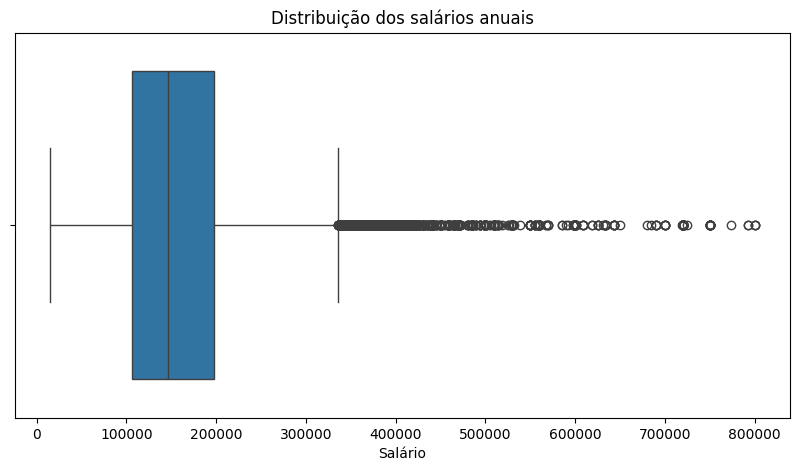

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['usd'])
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário')
plt.show()

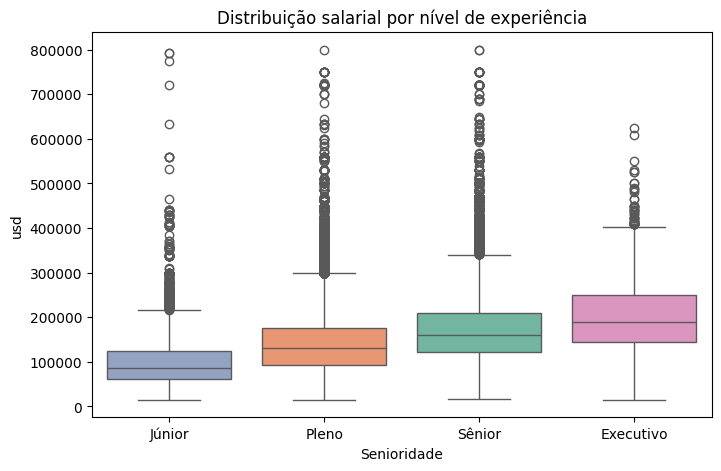

In [ ]:
ordem_senioridade=['júnior','pleno','sênior','executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade',y='usd',data=df,order=ordem,palette='Set2',hue='senioridade')
plt.title('Distribuição salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.show()

In [ ]:
import plotly.express as px
df_avg_salary = df.groupby('senioridade')['usd'].mean().reset_index()
fig = px.bar(
    df_avg_salary,
    x='senioridade',
    y='usd',
    title='Média Salarial por Senioridade',
    labels={'senioridade': 'Senioridade', 'usd': 'Salário Médio Anual (USD)'},
    category_orders={'senioridade': ordem}
)
fig.show()

In [ ]:
remoto_contagem=df['remoto'].value_counts().reset_index()
remoto_contagem.columns=['tipo_trabalho','quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção dos tipos de trabalho',
    hole=0.5

)
fig.update_traces(textinfo='percent+label')
fig.show()
